Notebook for simulating ising model 


In [1]:
%load_ext autoreload
%autoreload 2 

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Import ising model code 

In [3]:
import ising as ising  # ignore the warning that follows

Initializing lattice


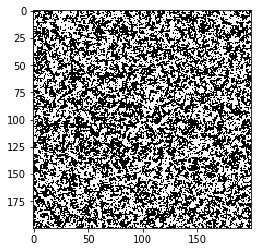

In [4]:
T=5              # set temperatures
nsteps = 1e6     # set number of steps 
lattice,latticeEnergies, energies = ising.ising(nsteps=nsteps,T=T)
import matplotlib.pylab as plt
plt.imshow(lattice,cmap="gray")

REPLACE ME
I donlt like the energy diff approach - may change this


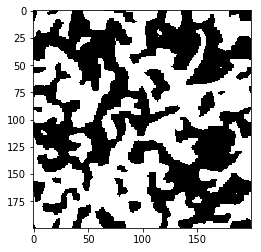

In [47]:
T=0.01
nsteps = 1e6
lattice,latticeEnergies,energies = ising.ising(nsteps=nsteps,T=T)
import matplotlib.pylab as plt
plt.imshow(lattice,cmap="gray")

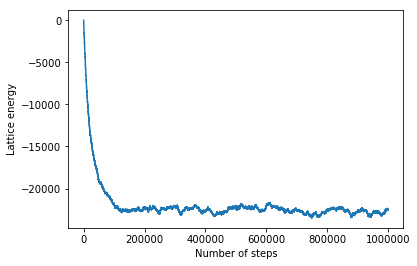

In [4]:
plt.plot(energies)
plt.ylabel("Lattice energy")
plt.xlabel("Number of steps")

Robust initialization - here we make a 'cold' equilibrated lattice by running it for a large number of Metropolis steps 


Initializing lattice


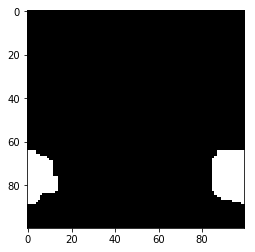

In [7]:
n=100
nsteps=1e7
T = 0.1  
latticeEquil,latticeEnergiesEquil,energies = ising.ising(n=n,nsteps=nsteps,T=T)
plt.imshow(latticeEquil,cmap="gray")

# we can also save the generated data as text files, if helpful
plt.savetxt("mydata.txt",latticeEquil)

In [5]:
plt.savetxt(latticeEquil,"mydata.txt")

NameError: name 'latticeEquil' is not defined

Here we 'warm' up an equilibrated lattice through the critical temperature 

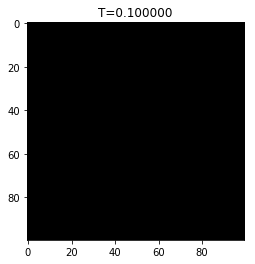

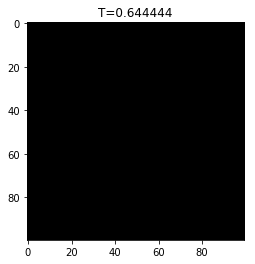

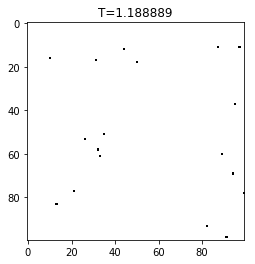

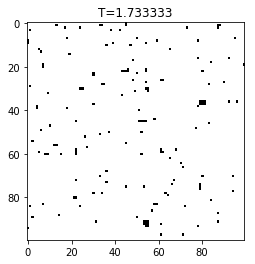

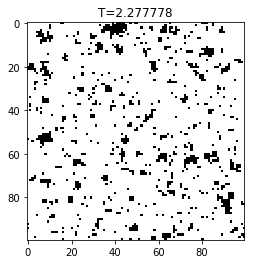

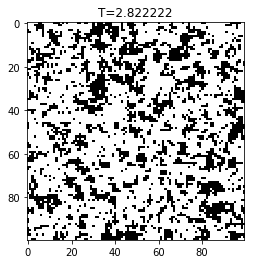

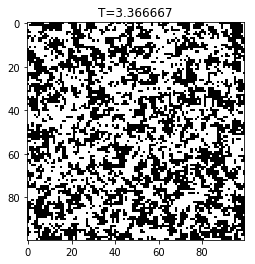

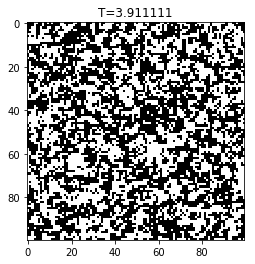

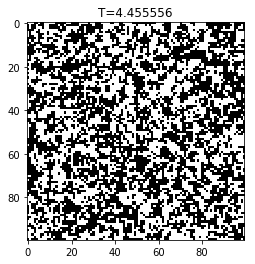

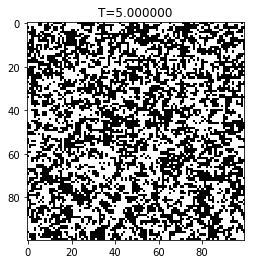

In [6]:
iters = 10   # number of temperatures
Ts = np.linspace(0.1,5,iters) # range of temperatures 
#print Ts

# wrappers for storing total magnetism, average energy, and heat capacity at different temperatures
Ms = np.zeros(iters)
Es = np.zeros(iters)
cvs = np.zeros(iters)

# here is where we store data from the previous step
latticePrev,latticeEnergiesPrev = latticeEquil,latticeEnergiesEquil

nsteps = 1e5
import analyze
for i,T in enumerate(Ts):
    # simulate Ising model at temp T 
    lattice,latticeEnergies,energies = ising.ising(n=n,nsteps=nsteps,T=T,lattice=latticePrev)
    
    # compute average magnetic moment, energy and heat capacity
    M,E,cv = analyze.getStats(lattice,latticeEnergies,T)
    
    # store results into arrays 
    Ms[i] = M
    Es[i] = E
    cvs[i] = cv                 
    plt.figure()
    plt.imshow(lattice,cmap="gray")
    plt.title("T=%f"%T)
    latticePrev,latticeEnergiesPrev = lattice,latticeEnergies

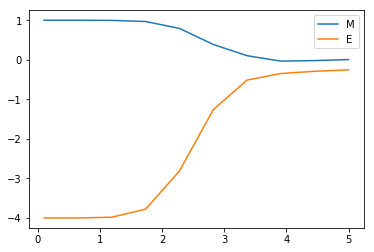

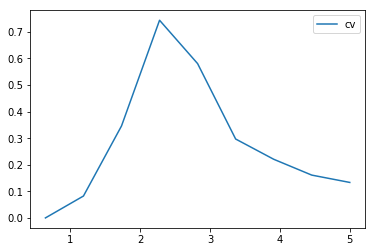

In [7]:
plt.plot(Ts,Ms,label="M")
plt.plot(Ts,Es,label="E")
plt.legend()
plt.figure()
plt.plot(Ts[1:],cvs[1:],label="cv")
plt.legend()

Initializing lattice


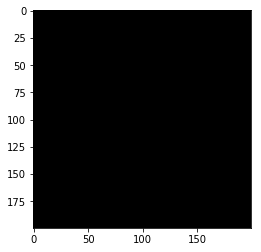

In [8]:
T=5              # set temperatures
nsteps = 1e6     # set number of steps 
lattice,latticeEnergies, energies = ising.ising(nsteps=nsteps,J=3,H=1)
import matplotlib.pylab as plt
plt.imshow(lattice,cmap="gray")